In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

df = pd.read_csv('performance_data.csv')

print("Raw data:")
print(df)

Raw data:
   topology grid_size  iterations  wall_time
0       2x2   200x200         100   0.022193
1       2x2   200x200         300   0.053029
2       2x2   200x200         500   0.083637
3       2x2   200x200        1000   0.166099
4       2x2   200x200        1600   0.272864
5       2x2   400x400         100   0.076316
6       2x2   400x400         300   0.199768
7       2x2   400x400         500   0.323909
8       2x2   400x400        1000   0.616499
9       2x2   400x400        1600   0.990703
10      2x2   800x800         100   0.284923
11      2x2   800x800         300   0.773363
12      2x2   800x800         500   1.271460
13      2x2   800x800        1000   2.450446
14      2x2   800x800        1600   3.942040
15      4x1   200x200         100   0.021152
16      4x1   200x200         300   0.051947
17      4x1   200x200         500   0.082275
18      4x1   200x200        1000   0.272864
19      4x1   200x200        1600   0.284067
20      4x1   400x400         100   0.075288


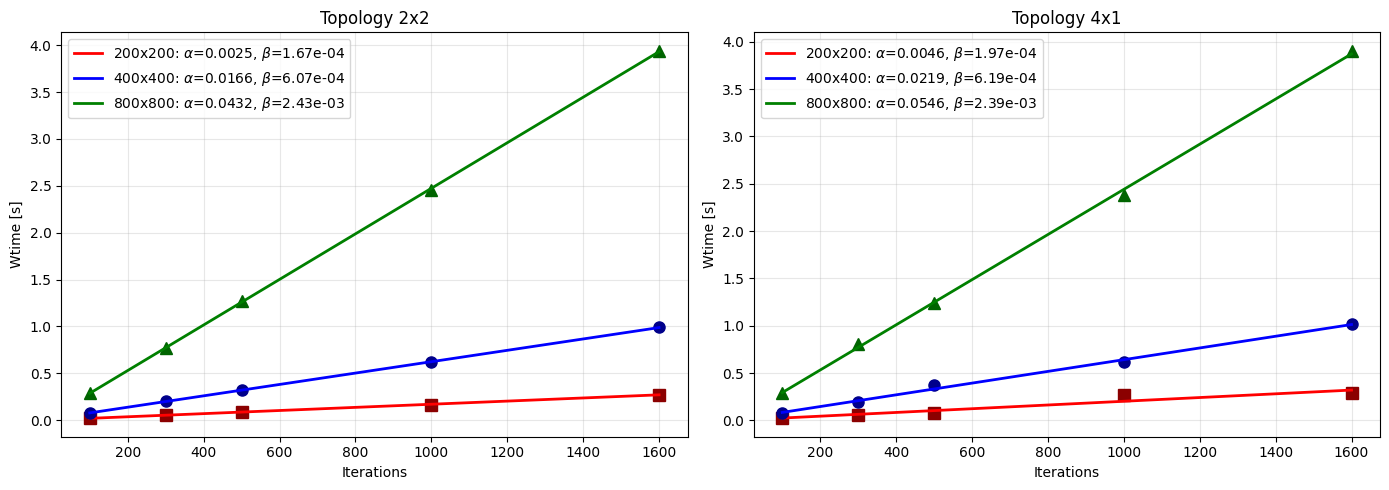

In [5]:
def linear_model(n, alpha, beta):
    return alpha + beta * n

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

topologies = [('2x2', df[df['topology'] == '2x2']), 
              ('4x1', df[df['topology'] == '4x1'])]

# Color schemes for each grid size
colors = {'200x200': ('darkred', 'red'), 
          '400x400': ('darkblue', 'blue'), 
          '800x800': ('darkgreen', 'green')}
markers = {'200x200': 's', '400x400': 'o', '800x800': '^'}

for ax, (topo_name, df_topo) in zip(axes, topologies):
    for grid_size in df_topo['grid_size'].unique():
        df_grid = df_topo[df_topo['grid_size'] == grid_size]
        
        xdata = np.array(df_grid['iterations'])
        ydata = np.array(df_grid['wall_time'])
        
        popt, _ = curve_fit(linear_model, xdata, ydata, bounds=([0, 0], [np.inf, np.inf]))
        alpha, beta = popt
        
        dark, light = colors.get(grid_size, ('gray', 'lightgray'))
        marker = markers.get(grid_size, 'o')
        
        ax.plot(xdata, ydata, marker, color=dark, markersize=8)
        ax.plot(xdata, linear_model(xdata, *popt), '-', color=light, linewidth=2,
                label=fr'{grid_size}: $\alpha$={alpha:.4f}, $\beta$={beta:.2e}')
    
    ax.set_xlabel('Iterations')
    ax.set_ylabel(r'Wtime [s]')
    ax.set_title(f'Topology {topo_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()